# Introduction to Regression Evaluation

-----

After building a regression model, there're various ways to evaluate the model. In the regression models introduced in previous lessons, we've used Mean Absolute Error(MAE), Mean Squared Error(MSE) and R-squared($R^2$) to measure the performance of the model.

In this notebook, we will explain these evaluation metrics in detail and how they are calculated. We will also introduce a new metric Root Mean Squared Error(RMSE) which is simply the square root of MSE.

The scikit learn module provides functions to return these metrics for regresson models defined in the module. We will construct scikit learn regression models on auto mpg data and demonstrate how to get these metrics.

we will also demonstrate how to evaluate the regression model with residual vs. observed plot.

-----


## Table of Contents

[Evaluation Metrics for Regression](#Evaluation-Metrics-for-Regression)
- [Mean Absolute Error (MAE)](#Mean-Absolute-Error-(MAE))
- [Mean Squared Error (MSE)](#Mean-Squared-Error-(MSE))
- [Root Mean Squared Error (RMSE)](#Root-Mean-Squared-Error-(RMSE))
- [R-squared ($R^2$)](#R-squared-($R^2$))

[Which Metric to Use](#Which-Metric-to-Use)

[Metrics Calculation](#Metrics-Calculation)

[Residual vs. Observed Plot](#Residual-vs.-Observed-Plot)

-----

-----
[[Back to TOC]](#Table-of-Contents)

## Evaluation Metrics for Regression

To explain the Evaluation Metrics for Regression, we will use a simple linear regression as example. A simple linear regression is a regression that has one dependent variable y and one independent variable x. The regression line will be a straight line, which is the representation of $y = \alpha + \beta x$, as shown in below image.

<img src="images/regression_plot.png" width="600">


In the plot:
- the green line is the simple regression line;
- for each independent variable $x_i$, the predicted value $\hat{y_i}$ is the $y$ value on the regression line corresponding to $x_i$; 
- The blue dots are observed values which are represented by $y_i$; 
- The difference between the observed value and the predicted value for $x_i$, $|y_i - \hat{y_i}|$, is the residual, or $\epsilon_i$.

We can calculate the residual for every point in our data set, and each of these residuals will be of use in assessment. These residuals will play a significant role in judging the usefulness of a model. If our collection of residuals are small, it implies that the model that produced them does a good job at predicting our output of interest. Conversely, if these residuals are generally large, it implies that model is a poor estimator.

There are many summary measurements that take the collection of residuals and condense them into a single value that represents the predictive ability of our model. In this notebook, we will cover:

- Mean Absolute Error(MAE)
- Mean Squared Error(MSE)
- Root Mean Squared Error(RMSE)

-----

[id]: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

### Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

The formal equation is shown below:
$$
MAE = \frac{1}{n} \sum |y - \hat{y}|
$$
or
$$
MAE = \frac{1}{n} \sum |\epsilon|
$$

The MAE is the most intuitive of the metrics since we’re just looking at the absolute difference between the observed data and the model’s predictions. Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error. A small MAE suggests the model is good at prediction, while a large MAE suggests that your model is poor or may have trouble in certain areas. A perfect predictor will have a MAE of 0 which will almost never happen.

While the MAE is easily interpretable, using the absolute value of the residual often is not as desirable as squaring this difference. Depending on how you want your model to treat outliers, or extreme values, in your data, you may want to bring more attention to these outliers. The issue of outliers can play a major role in which error metric you use. This brings up the next metric, Mean Squared Error or MSE.

### Mean Squared Error (MSE)

The mean squared error (MSE) is similar to MAE, but squares the difference before summing them all instead of using the absolute value.

The formal equation is shown below:

$$
MSE = \frac{1}{n} \sum (y - \hat{y})^2
$$
or
$$
MSE = \frac{1}{n} \sum \epsilon^2
$$

The effect of the square term in the MSE equation is most apparent with the presence of outliers in the data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This  means that outliers in the data will contribute to much higher total error in the MSE than they would the MAE. In another word, the large differences between actual and predicted are punished more in MSE than in MAE. 

Since the MSE is squared, its units do not match that of the original data, this brings up the next metric, Root Mean Squared Error(RMSE).

### Root Mean Squared Error (RMSE)

Root Mean Squared Error(RMSE) is simply the square root of Mean Squared Error(MSE).

The equation is shown below:
$$
RMSE = \sqrt{MSE}
$$
or
$$
RMSE = \sqrt{\frac{1}{n} \sum (y - \hat{y})^2}
$$


RMSE is arguably the most popular metric to measure the error rate of a regression model. It has advantages of both MAE and MSE:
- The square term gives higher weight and punishes large errors(outliers).
- The square root term makes RMSE same unit as original output, making interpretation easier.

When the RMSE decreases, the model’s performance will improve. But these values alone are not intuitive on judging a model. This brings up R-squared($R^2$).

### R-squared ($R^2$)

R-sqaured ($R^2$) is also called Coefficient of Determination. It compares the MSE of your model and the base model. The base model serves as a benchmark, which simply take the mean of all observed values as the prediction. So the MSE of the base model will be:
$$
MSE_{base} = \frac{1}{n} \sum (\bar{y} - \hat{y})^2
$$
Where $\bar{y}$ is the mean of observed outputs.

We can compare our model's MSE with base model's MSE by $\frac{MSE_{model}}{MSE_{base}}$. Normally, we expect our model predicts the output better than the simple mean, so $MSE_{model}$($MSE$ introduced above) is expected to be smaller than $MSE_{base}$, so the value of $\frac{MSE_{model}}{MSE_{base}}$ is normally between 0 and 1. 0 means our model predicts perfectly becasue our model's MSE is 0, 1 means our model's MSE is same as base model's MSE, so our model doesn't predit better than the simple mean. When the value is greater than 1, it means the prediction of our model is even worse than the simple mean.

Since we are used to use bigger number to represent better result, we define R-sqaured as:

$$
R^2 = 1- \frac{MSE_{model}}{MSE_{base}}
$$

Now $R^2 = 0$ means the prediction of our model is not better than the simple mean, while $R^2 = 1$ means our model predicts perfectly. A negative $R^2$ means the prediction of the model is even worse than the simple mean. So normally, the range of $R^2$ is 0 to 1.

-----
[[Back to TOC]](#Table-of-Contents)
## Which Metric to Use

$R^2$ value is very intuitive. But researches show that $R^2$ is only valid for linear regression. Most of regression models we introduced so far, like Decision Tree or KNN, are non-linear models. For those non-linear models, we can't completely trust $R^2$. It's prefered to always use $R^2$ together with other metrics like MAE and RMSE. When you want to downplay outliers, you may use MAE; when you want to give more attension to outliers, use RMSE.

-----
[[Back to TOC]](#Table-of-Contents)
## Metrics Calculation

All the metrics introduced above are easy to calculate. We simply apply the trained regression model on testing data to get the predictions, which is $\hat{y}$. Observed outputs $y$ is the output of testing data. With predicted and observed values available, we can use the equation introduced above to get those metrics. Scikit learn module, however, provides functions to get various regression metrics for the models defined in the module. 

In the following code cells, we will demonstrate regression metrics with the automobile fuel performance prediction data.

In the first code cell, we load and prepare the data. We display 5 sample rows of training data to show that data is loaded successfully.

In the second code cell, we construct a decision tree regressor and display the regression metrics.

In the third code cell, we construct a random forest regressor on same dataset and display the regression metrics.

---


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

auto_data = sns.load_dataset('mpg')
auto_data['origin_code'] = LabelEncoder().fit_transform(auto_data.origin)

# pick dependent and independent variables
y = auto_data['mpg']
x = auto_data[['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin_code']]

# Split data intro training:testing data set
ind_train, ind_test, dep_train, dep_test = train_test_split(x, y, test_size=0.4, random_state=23)
ind_train.sample(5)

,cylinders,displacement,weight,acceleration,model_year,origin_code
247,4,85.0,2070,18.6,78,1
394,4,97.0,2130,24.6,82,0
263,6,231.0,3445,13.4,78,2
339,4,151.0,2635,16.4,81,2
83,4,98.0,2164,15.0,72,2


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

# Create Regressor with default properties
dtr = DecisionTreeRegressor(random_state=23)

# Fit estimator
dtr = dtr.fit(ind_train, dep_train)

# Regress on test data
pred = dtr.predict(ind_test)

# Copute performance metrics
mae = mean_absolute_error(dep_test, pred)
mse = mean_squared_error(dep_test, pred)
rmse = math.sqrt(mse)
mr2 = r2_score(dep_test, pred)

# Display metrics
print('Decision Tree Regression Metrics:')
print(f'R^2 Score                  = {mr2:5.3f}')
print(f'Mean Absolute Error        = {mae:4.2f}')
print(f'Mean Squared Error         = {mse:4.2f}')
print(f'Root Mean Squared Error    = {rmse:4.2f}')

Decision Tree Regression Metrics:
R^2 Score                  = 0.814
Mean Absolute Error        = 2.37
Mean Squared Error         = 10.04
Root Mean Squared Error    = 3.17


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Create Regressor with default properties
rfr = RandomForestRegressor(n_estimators=10, random_state=23)

# Fit estimator
rfr = rfr.fit(ind_train, dep_train)

# Regress on test data
pred = rfr.predict(ind_test)

# Copute performance metrics
mae = mean_absolute_error(dep_test, pred)
mse = mean_squared_error(dep_test, pred)
rmse = math.sqrt(mse)
mr2 = r2_score(dep_test, pred)

# Display metrics
print('Random Forest Regression Metrics:')
print(f'R^2 Score                  = {mr2:5.3f}')
print(f'Mean Absolute Error        = {mae:4.2f}')
print(f'Mean Squared Error         = {mse:4.2f}')
print(f'Root Mean Squared Error    = {rmse:4.2f}')

Random Forest Regression Metrics:
R^2 Score                  = 0.846
Mean Absolute Error        = 2.15
Mean Squared Error         = 8.28
Root Mean Squared Error    = 2.88


---
Random Forest Regressor gets better result on all metrics than that of the Decision Tree Regressor. It gets larger $R^2$ and smaller MAE, MSE and RMSE. Based on the metrics, we can say that Random Forest Regressor is a better model for this dataset.


-----

<font color='red' size = '5'> Student Exercise </font>

We compared the regression metrics of Random Forest Regressor with Decision Tree Regressor above. Now try making changes on the same regressor and compare the metrics:

1. pick different independent variables.
2. set different hpyerparameters of the model you choose to use.

-----

[[Back to TOC]](#Table-of-Contents)
## Residual vs. Observed Plot

A residual vs. observed plot is a graph that shows the residuals on the vertical axis and the dependent variable on the horizontal axis. The plot shows the residual or errors of the prediction on different value of observed. Ideally, the plot should be pretty symmetrically distributed around 0, and tending to cluster towards the 0 line; there shouldn't be any clear patterns.

In the following code cells, we will first define a function which plots residual vs. observed. Then we'll plot residual vs. observed for both of the decision tree and random forest regression models created above.


In [4]:
% matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

def plot_residual_vs_observed(predicted, observed, dep_name, model_name):
    '''
    Plot residual vs observed.
    
    predicted: numpy array, predicted values
    observed: numpy array, observed values
    dep_name: string, dependent variable name
    model_name: string, type of the regression model
    '''
    
    #get residule
    residual = predicted - observed

    #calculate y-axis range based on residual
    upper = np.max(residual)
    lower = np.min(residual)
    y_range = max(abs(upper), abs(lower))*1.5
    
    #calcuate x-axis range based on observed
    x_low = np.min(observed) * 0.8
    x_high = np.max(observed) * 1.2

    # Set up plot area
    sns.set(style="white")
    fig, ax = plt.subplots(figsize=(10, 4))

    
    # Plot model residuals
    ax.scatter(observed, residual, alpha = .5)

    # Show zero residual line
    ax.hlines(0, x_low, x_high, color='r', linestyle='--', alpha=0.25)

    # Decorate final plot
    ax.set_xlabel(dep_name, fontsize=14)
    ax.set_ylabel("Residual", fontsize=14)
    ax.set_title(f"Residual vs. Observed: {model_name}", fontsize=18)
    ax.set_ylim(-y_range, y_range)
    sns.despine(ax=ax, trim=True)

#### Residual vs. Observed: Decision Tree Regressor

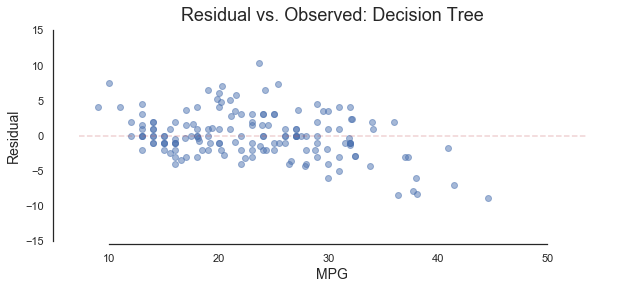

In [5]:
#get predicted from dtr
predicted = dtr.predict(ind_test)
plot_residual_vs_observed(predicted, dep_test, 'MPG', 'Decision Tree')

#### Residual vs. Observed: Random Forest Regressor

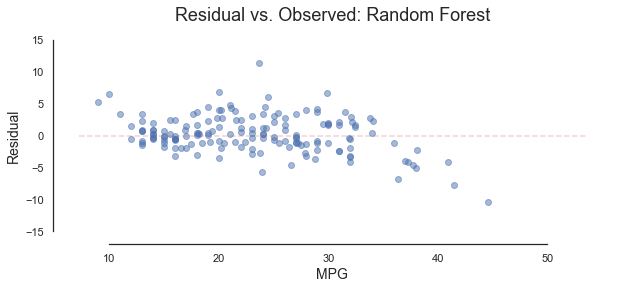

In [6]:
#get predicted from dtr
predicted = rfr.predict(ind_test)
plot_residual_vs_observed(predicted, dep_test, 'MPG', 'Random Forest')

From the residual vs. Observed plot, we can see that the residuals of the random forest regressor are clustered around 0 line more closely than that of decision tree regressor. This means our random forest regressor predits mpg with generally small residual or error. On the other hand, both models tend to over predict when observed mpg is low(<15) and under predict when mpg is high(>35). We can try improve our model or choose better models based on this information.

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Understanding [regression error metrics](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

-----


**&copy; 2019: Gies College of Business at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode